Best alpha : 0.0005835919312872377


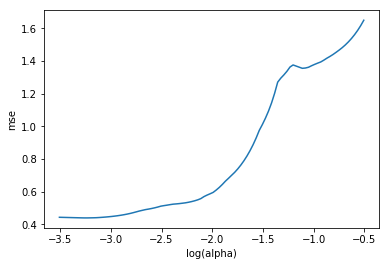

cv of rmse : 0.6620958973317362
RMSE on Training set : 0.3993192230178992
RMSE on Test set : 0.560513167548579
r2_score on Training set : 0.8405441581283812
r2_score on Test set : 0.6858249890046586
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 1 columns):
cnt    366 non-null float64
dtypes: float64(1)
memory usage: 2.9 KB


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  


#数据读取及处理
path='C:/Users/zjy/Desktop/Source/Python/Code/Trianing/W1/'
data=pd.read_csv(path+"LR_day.csv")
data = data.drop(['instant'], axis = 1)

#训练集数据
train = data[data.yr ==0]
X_train=train.drop(['cnt'],axis=1).values
y_train = train['cnt'].values

#训练集标准化
mean_y = y_train.mean()
std_y = y_train.std()
y_train = (y_train - mean_y)/std_y

#选择2012年的数据为测试数据
test = data[data.yr == 1]
X_test=test.drop(['cnt'],axis=1).values
y_test = test['cnt'].values
#测试集标准化
mean_y = y_test.mean()
std_y = y_test.std()
y_test = (y_test - mean_y)/std_y
mean_test_y = y_test.mean()
mean_diff = mean_test_y;

# Lasso回归
lasso = LassoCV()
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    

mse_cv = np.mean(lasso.mse_path_, axis = 1)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

# Plot 
y_train_pred = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("RMSE on Training set :", rmse_train)

#测试集评估及提交
y_test_pred = lasso.predict(X_test)
y_test_pred += mean_diff

rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE on Test set :", rmse_test)

r2_score_train = r2_score(y_train,y_train_pred)
r2_score_test = r2_score(y_test,y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

y_test_pred = lasso.predict(X_test)
y_test_pred += mean_diff
y_test_pred = y_test_pred * std_y +  mean_y

#生成提交测试结果
df = pd.DataFrame({'cnt':y_test_pred})
df.to_csv('submission.csv')

df.info()